<a href="https://colab.research.google.com/github/abeer7asan/AI/blob/main/CaleforniaHouses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

The 10-Step Machine Learning Project Workflow:

1. Define business object
2. Make sense of the data from a high level
*  data types (number, text, object, etc.)
* continuous/discrete
* basic stats (min, max, std, median, etc.) using boxplot
* frequency via histogram
* scales and distributions of different features
3. Create the traning and test sets using proper sampling methods, e.g., random vs. stratified
4. Correlation analysis (pair-wise and attribute combinations)
5. Data cleaning (missing data, outliers, data errors)
6. Data transformation via pipelines (categorical text to number using one hot encoding, feature scaling via normalization/standardization, feature combinations)
7. Train and cross validate different models and select the most promising one (Linear Regression, Decision Tree, and Random Forest were tried in this tutorial)
8. Fine tune the model using trying different combinations of hyperparameters
9. Evaluate the model with best estimators in the test set
10. Launch, monitor, and refresh the model and system

https://www.kaggle.com/code/harrywang/housing-price-prediction

https://www.kaggle.com/code/ilialar/california-housing-analysis-and-preciction

https://www.kaggle.com/code/bernhard1/c2-california-housing

In [2]:
import os
print(os.listdir("./sample_data"))
data_path = "./sample_data/california_housing_train.csv"
housing = pd.read_csv(data_path)

# see the basic info
housing.info()


['README.md', 'anscombe.json', 'california_housing_test.csv', 'mnist_test.csv', 'mnist_train_small.csv', 'california_housing_train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Data Types
**head()** shows the valuse of top rows, which gives more idea on data types. Pandas guessed the data types of features when reading in the data, which may not always work. In this dataset, you can see ocean_proximity feature is text. Sometimes, the price feature may also be object type becaue the raw data has $ sign, in which case you need to convert the data type from object to float64 if you want to use this feature in the model.

In [3]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0



Basic Stats

**describe()** shows a summary of numerial features, which can be visualized using boxplots and histograms.

 **value_counts()** can be used to generate a summary of categorical features.


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

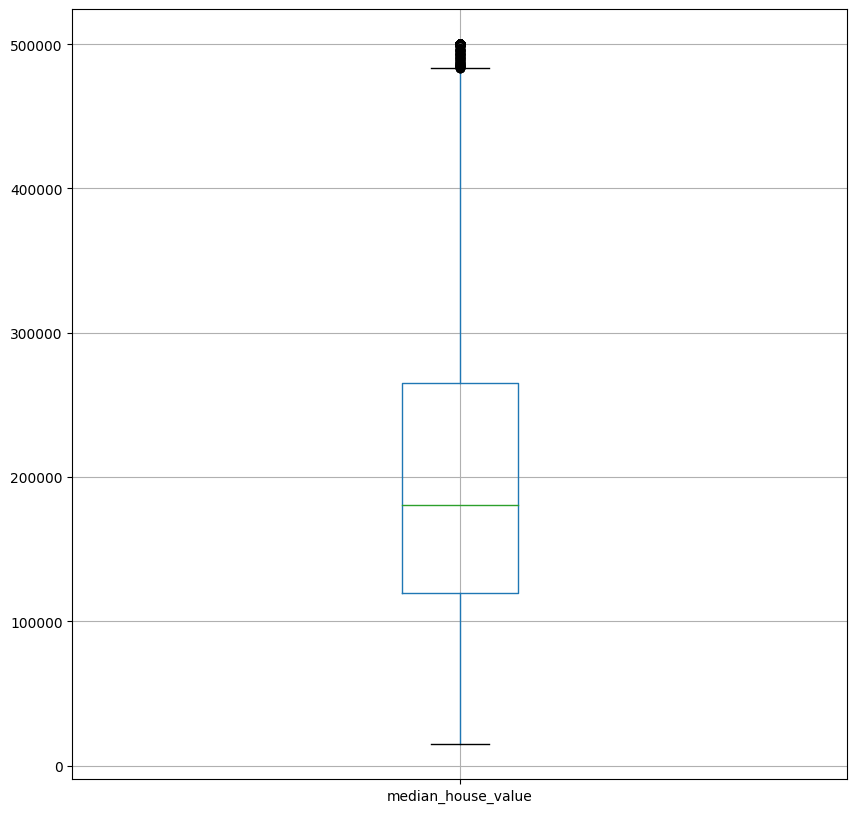

In [5]:
housing.boxplot(['median_house_value'], figsize=(10, 10))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

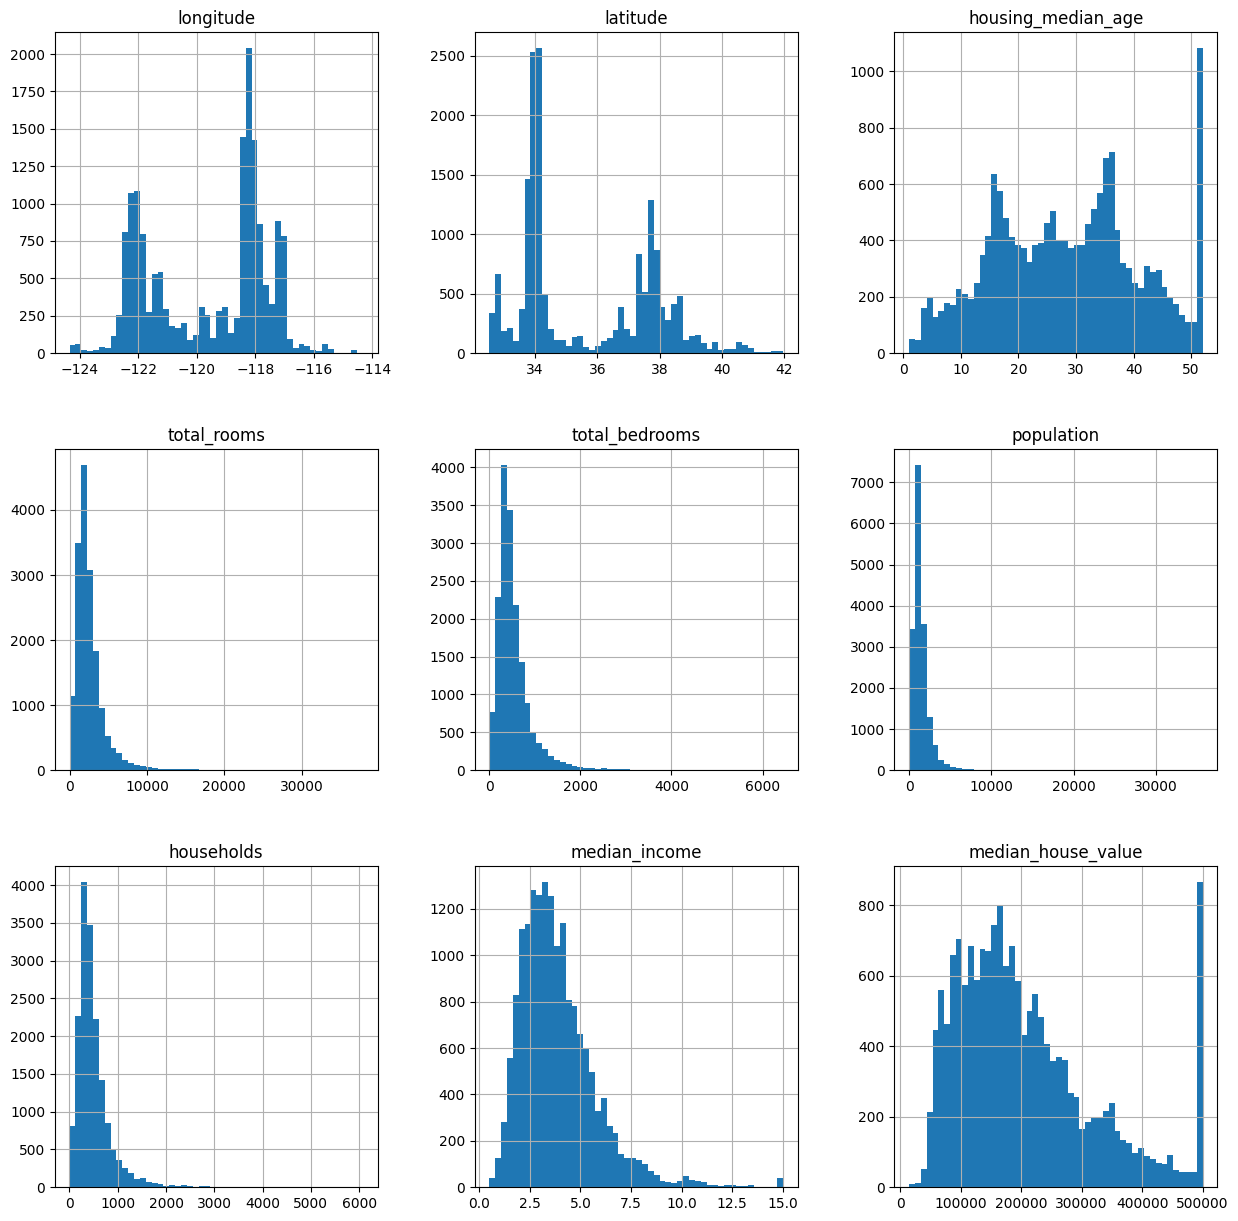

In [6]:
# histogram
housing.hist(bins=50, figsize=(15, 15))

**Create Training, Validation, and Test Data Sets**

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "train + ", len(test_set), "test")

13600 train +  3400 test


In [8]:
test_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10941,-120.87,37.77,9.0,4838.0,920.0,2460.0,923.0,3.5959,142700.0
5250,-118.14,34.11,52.0,2742.0,422.0,1153.0,414.0,8.1124,500001.0
10292,-120.05,36.98,16.0,3705.0,739.0,2463.0,697.0,2.5288,61800.0
2266,-117.42,34.02,9.0,5455.0,882.0,3015.0,858.0,4.2321,162800.0
6398,-118.26,33.97,52.0,1331.0,346.0,1144.0,362.0,1.5326,90600.0
4064,-117.97,33.68,26.0,1616.0,292.0,700.0,241.0,5.5105,232100.0
8018,-118.42,34.27,35.0,674.0,153.0,808.0,173.0,2.6667,147800.0
3934,-117.96,34.02,33.0,349.0,124.0,460.0,83.0,2.3750,133300.0
16287,-122.49,37.73,48.0,1190.0,182.0,497.0,199.0,6.2642,438500.0
8875,-118.77,34.28,26.0,2873.0,480.0,1915.0,475.0,5.3681,187700.0


**Create Training, Validation, and Test Data Sets**

To avoid data** snooping bias**, you should set aside 20% of the data as the test set without further exploriation of the data.

the above wwa depends on random seeds ----> it is used when the data set is large.

the following is another way for sampling where the data is devided intp categories based on an importans measurment and then we pic number of rows from each category

<Axes: >

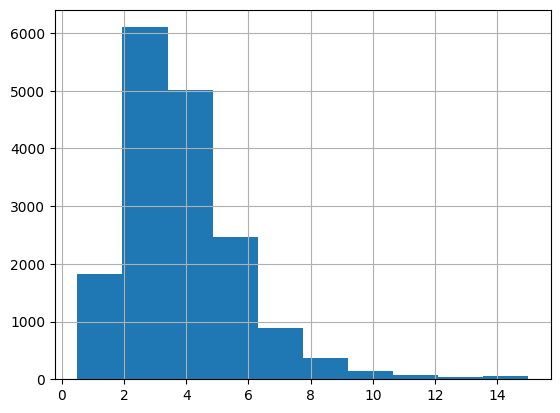

In [9]:
housing['median_income'].hist()


We limit the number of categories by dividing the median income by 1.5 and merge all the income greater than 5 into 5. Then, we can use stratified sampling.

in the first line, a new column was added to the data set, the column is income_cat and calculated based on median income


<Axes: >

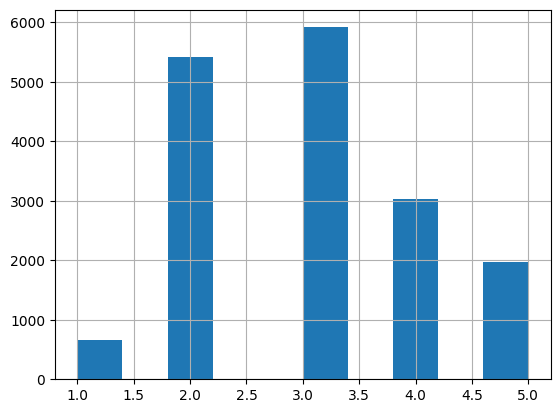

In [10]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)  ## np.ceil: ceiling function
# DataFrame.where(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False, raise_on_error=None)
# Where cond is True, keep the original value. Where False, replace with corresponding value from other
housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)
housing['income_cat'].hist()

In [11]:
# stratified sampling based on income categories
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
8774,-118.61,34.20,16.0,1718.0,467.0,896.0,475.0,3.6296,160900.0,3.0
5968,-118.21,33.95,35.0,2129.0,614.0,2376.0,618.0,2.0372,160800.0,2.0
13489,-121.96,37.99,2.0,3129.0,707.0,1606.0,698.0,2.9591,210100.0,2.0
13653,-121.99,37.96,17.0,2756.0,423.0,1228.0,426.0,5.5872,200600.0,4.0
8391,-118.47,34.26,34.0,1300.0,289.0,650.0,291.0,3.8875,199200.0,3.0
13521,-121.96,37.28,33.0,1940.0,327.0,877.0,314.0,5.4386,280400.0,4.0
4234,-118.00,33.94,37.0,903.0,158.0,444.0,158.0,3.7500,174400.0,3.0
16728,-122.87,38.43,36.0,1987.0,387.0,1065.0,347.0,4.0446,172200.0,3.0
4382,-118.02,33.80,24.0,84.0,14.0,32.0,8.0,5.8750,193800.0,4.0
8174,-118.43,33.87,41.0,847.0,173.0,344.0,170.0,6.8220,500001.0,5.0


compare the distribution of income_cat in the test sample with the train sample, if the test sample is good we should have similar distribution


In [12]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.348176
2.0    0.318412
4.0    0.178176
5.0    0.116176
1.0    0.039059
Name: income_cat, dtype: float64

In [13]:
strat_test_set['income_cat'].value_counts() / len(housing)

3.0    0.069647
2.0    0.063647
4.0    0.035647
5.0    0.023235
1.0    0.007824
Name: income_cat, dtype: float64

In [14]:
test_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10941,-120.87,37.77,9.0,4838.0,920.0,2460.0,923.0,3.5959,142700.0
5250,-118.14,34.11,52.0,2742.0,422.0,1153.0,414.0,8.1124,500001.0
10292,-120.05,36.98,16.0,3705.0,739.0,2463.0,697.0,2.5288,61800.0
2266,-117.42,34.02,9.0,5455.0,882.0,3015.0,858.0,4.2321,162800.0
6398,-118.26,33.97,52.0,1331.0,346.0,1144.0,362.0,1.5326,90600.0
4064,-117.97,33.68,26.0,1616.0,292.0,700.0,241.0,5.5105,232100.0
8018,-118.42,34.27,35.0,674.0,153.0,808.0,173.0,2.6667,147800.0
3934,-117.96,34.02,33.0,349.0,124.0,460.0,83.0,2.3750,133300.0
16287,-122.49,37.73,48.0,1190.0,182.0,497.0,199.0,6.2642,438500.0
8875,-118.77,34.28,26.0,2873.0,480.0,1915.0,475.0,5.3681,187700.0


In [15]:
# we need to do the random sampling again to include income_cat column
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

test_set['income_cat'].value_counts() / len(test_set)

3.0    0.345588
2.0    0.319412
4.0    0.177647
5.0    0.122353
1.0    0.035000
Name: income_cat, dtype: float64

In [16]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 10941 to 6188
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3400 non-null   float64
 1   latitude            3400 non-null   float64
 2   housing_median_age  3400 non-null   float64
 3   total_rooms         3400 non-null   float64
 4   total_bedrooms      3400 non-null   float64
 5   population          3400 non-null   float64
 6   households          3400 non-null   float64
 7   median_income       3400 non-null   float64
 8   median_house_value  3400 non-null   float64
 9   income_cat          3400 non-null   float64
dtypes: float64(10)
memory usage: 292.2 KB


In [17]:
# drop the income_cat attributes
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [18]:
# check the dropping result
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 8774 to 873
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3400 non-null   float64
 1   latitude            3400 non-null   float64
 2   housing_median_age  3400 non-null   float64
 3   total_rooms         3400 non-null   float64
 4   total_bedrooms      3400 non-null   float64
 5   population          3400 non-null   float64
 6   households          3400 non-null   float64
 7   median_income       3400 non-null   float64
 8   median_house_value  3400 non-null   float64
dtypes: float64(9)
memory usage: 265.6 KB


In [19]:
housing1 = strat_train_set.copy()
housing1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 693 to 11489
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13600 non-null  float64
 1   latitude            13600 non-null  float64
 2   housing_median_age  13600 non-null  float64
 3   total_rooms         13600 non-null  float64
 4   total_bedrooms      13600 non-null  float64
 5   population          13600 non-null  float64
 6   households          13600 non-null  float64
 7   median_income       13600 non-null  float64
 8   median_house_value  13600 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


Additional Visualizations for Data Exploration
The following geographical data visualizations show that the price is related to the location and population density

<Axes: xlabel='longitude', ylabel='latitude'>

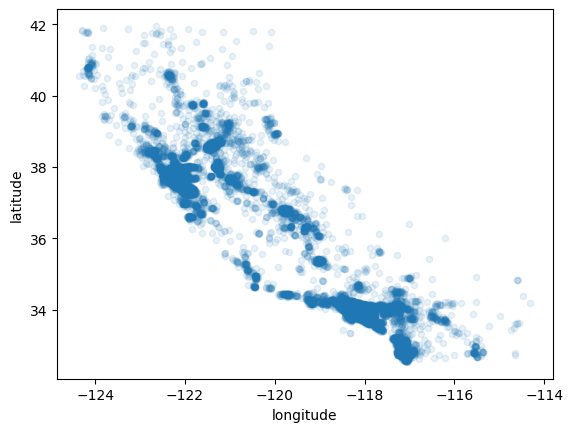

In [20]:
housing1.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

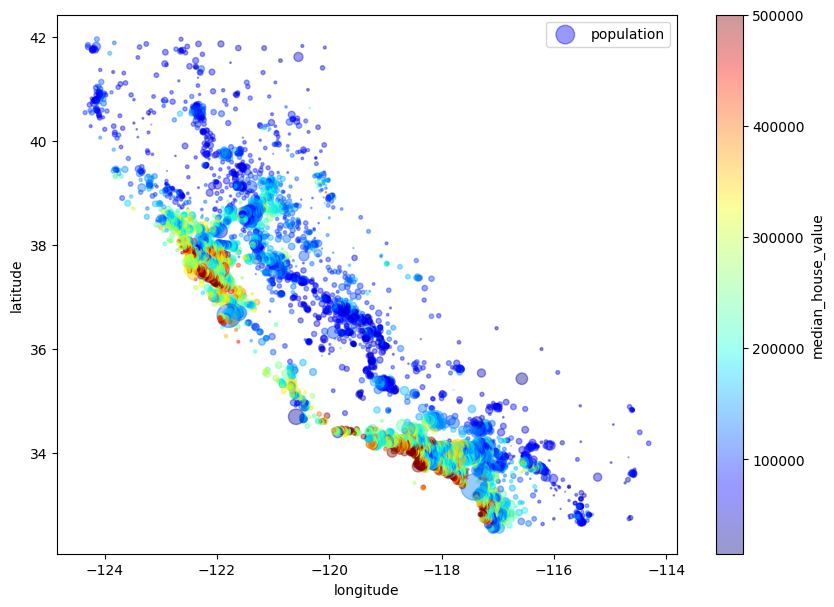

In [21]:
# option s: radius of each circle represent the population/100
# option c: color represents the median price
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
    s=housing['population']/100, label='population', figsize=(10,7),
    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [22]:
# Pearson's r, aka, standard correlation coefficient for every pair
corr_matrix = housing1.corr()
# Check the how much each attribute correlates with the median house value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690264
total_rooms           0.126292
housing_median_age    0.109845
households            0.057418
total_bedrooms        0.041573
population           -0.030684
longitude            -0.044802
latitude             -0.144512
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

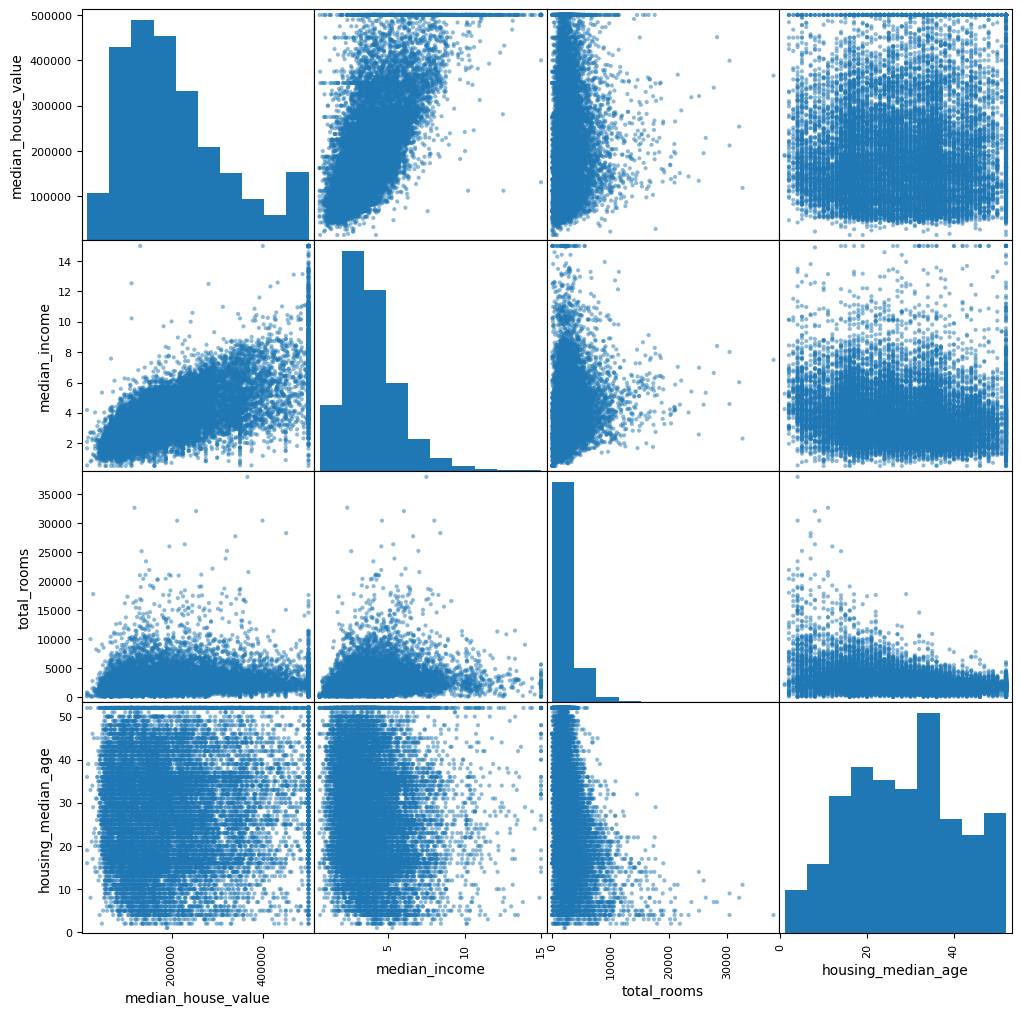

In [23]:
import pandas as pd
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,12))

from the correlation above, there is a relation between We can see that median_income is a promising attribute to predict median_house_value.

<Axes: xlabel='median_income', ylabel='median_house_value'>

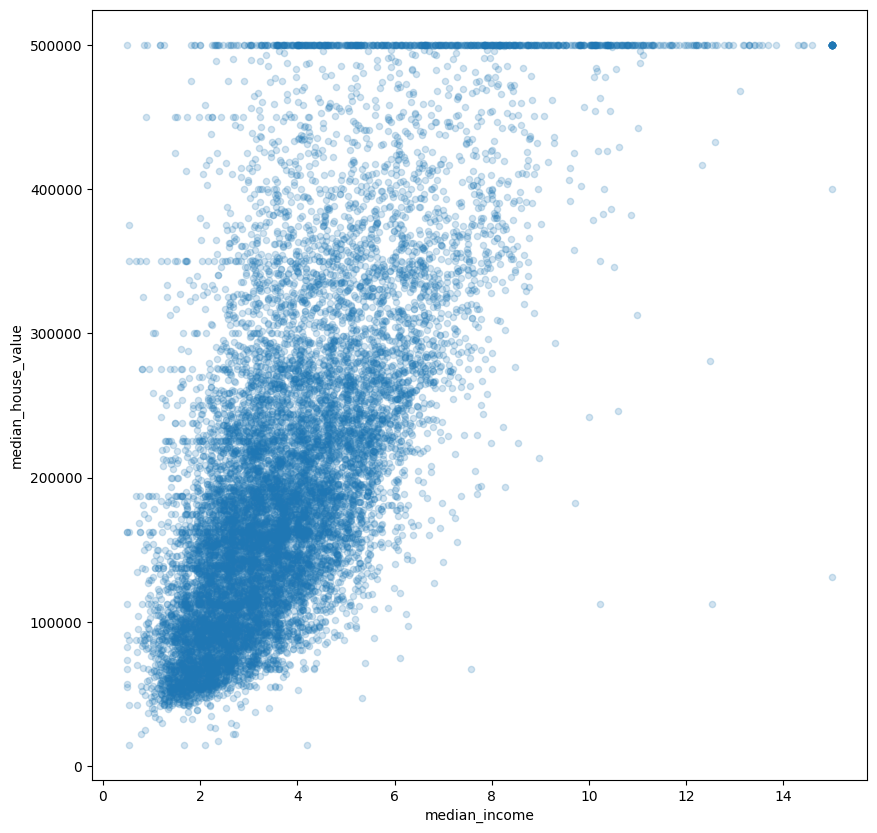

In [24]:
 housing1.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, figsize=(10,10))

**Attribute Combinations**

Sometime, the combinations of attributes are more meaningful and interesting in terms of solving the business problems, e.g.,

rooms per household: total # of rooms per district is not useful but rooms per household may be interesting
bedroom/total room ratio
population per household

In [25]:
# calculated attributes
housing1['rooms_per_household'] = housing1['total_rooms']/housing1['households']
housing1['bedrooms_per_room'] = housing1['total_bedrooms']/housing1['total_rooms']
housing1['population_per_household'] = housing1['population']/housing1['households']

# checkout the correlations again
corr_matrix = housing1.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690264
rooms_per_household         0.143555
total_rooms                 0.126292
housing_median_age          0.109845
households                  0.057418
total_bedrooms              0.041573
population                 -0.030684
longitude                  -0.044802
latitude                   -0.144512
population_per_household   -0.177666
bedrooms_per_room          -0.261583
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='rooms_per_household', ylabel='median_house_value'>,
        <Axes: xlabel='population_per_household', ylabel='median_house_value'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='rooms_per_household', ylabel='median_income'>,
        <Axes: xlabel='population_per_household', ylabel='median_income'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='rooms_per_household'>,
        <Axes: xlabel='median_income', ylabel='rooms_per_household'>,
        <Axes: xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <Axes: xlabel='population_per_household', ylabel='ro

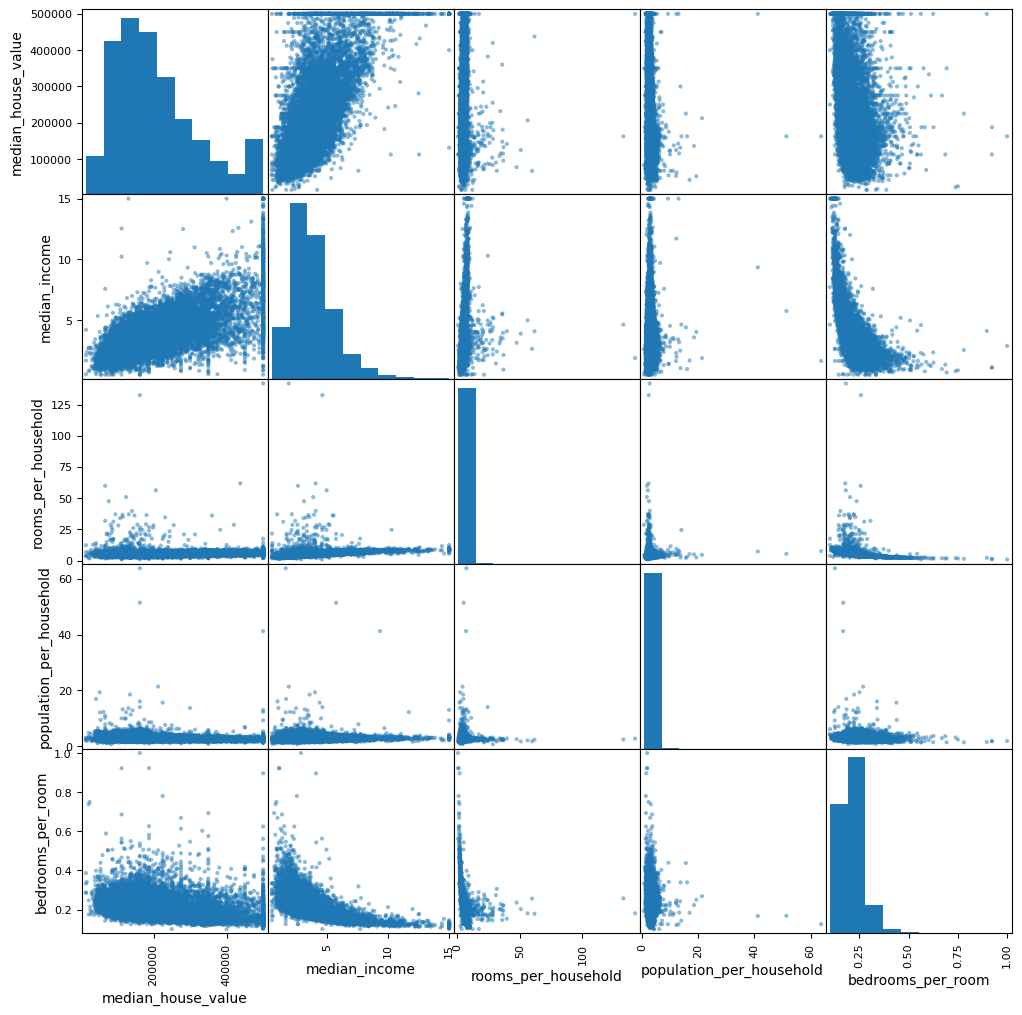

In [26]:
attributes = ['median_house_value', 'median_income', 'rooms_per_household', 'population_per_household', 'bedrooms_per_room']
scatter_matrix(housing1[attributes], figsize=(12,12))

**Two findings after combining attributes:**

rooms_per_household is slightly more correlated (0.146285) with house value than total_rooms (0.135097)
bedrooms_per_room is much more correlated (-0.259984) than total_rooms (0.135097) and total_bedrooms (0.047689): houses with lower bedroom/room ratio is more expensive: this sort of make sense, more expensive houses may have more offices, dens, playrooms, etc.

**Data Cleaning and Transformation**

Typically, data need to be cleaned and transformed before trying different ML algorithms.

missing data in one attribute.
Three ways to handle this:

1. remove the observations with missing values using dropna();

```
housing.dropna(subset=['total_bedrooms']
```

2. remove the entire attribute using drop();

```
housing.drop('total_bedrooms', axis=1)
```
3. set/impute the missing values using fillna()

```
median = housing['total_bedroom'].median()
housing['total_bedrooms'].fillna(median, inplace=True)
```



**Seperate the predictors (independent variables) and labels (target/dependent variables)**
We want to create a clean training set first.

In [27]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 693 to 11489
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 13600 non-null  float64
 1   latitude                  13600 non-null  float64
 2   housing_median_age        13600 non-null  float64
 3   total_rooms               13600 non-null  float64
 4   total_bedrooms            13600 non-null  float64
 5   population                13600 non-null  float64
 6   households                13600 non-null  float64
 7   median_income             13600 non-null  float64
 8   median_house_value        13600 non-null  float64
 9   rooms_per_household       13600 non-null  float64
 10  bedrooms_per_room         13600 non-null  float64
 11  population_per_household  13600 non-null  float64
dtypes: float64(12)
memory usage: 1.3 MB


In [28]:
housing_predictors = strat_train_set.drop("median_house_value", axis=1) # drop target labels for training set
housing_labels = strat_train_set["median_house_value"].copy() # this is the target label vector
housing_predictors.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 693 to 11489
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13600 non-null  float64
 1   latitude            13600 non-null  float64
 2   housing_median_age  13600 non-null  float64
 3   total_rooms         13600 non-null  float64
 4   total_bedrooms      13600 non-null  float64
 5   population          13600 non-null  float64
 6   households          13600 non-null  float64
 7   median_income       13600 non-null  float64
dtypes: float64(8)
memory usage: 956.2 KB


In [29]:
housing_labels.info()

<class 'pandas.core.series.Series'>
Int64Index: 13600 entries, 693 to 11489
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
13600 non-null  float64
dtypes: float64(1)
memory usage: 212.5 KB


**Scikit-Learn's Imputer** is a class within the Scikit-Learn library (also known as sklearn) that provides a way to handle missing values in a dataset. Missing data is a common issue in real-world datasets, and addressing it is important for accurate analysis and modeling.

The Imputer class in Scikit-Learn offers various strategies to fill in missing values. Here are some of the strategies it supports:

1. Mean: This strategy replaces missing values with the mean of the non-missing values in the same column.

2. Median: Similar to the mean strategy, but it replaces missing values with the median of the non-missing values in the column.

3. Most Frequent: This strategy replaces missing values with the most frequent value (mode) in the column.

4. Constant: Allows you to replace missing values with a specified constant value.

5. Custom: You can also provide a custom value or function to fill in the missing values based on your specific needs.

Here's an example of how you might use the Imputer class:


```
from sklearn.impute import SimpleImputer

# Create an Imputer instance with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data
imputer.fit(X)

# Transform the data by replacing missing values with the imputed values
X_imputed = imputer.transform(X)

```



In [30]:
# using Scikit-Learn Imputer
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

# remove non-numerical attributes for Imputer by making a copy of the dataframe
#housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_predictors)  # this computes median for each attributes and store the result in statistics_ variable
imputer.statistics_  # same result as housing_num.median().values

ImportError: ignored